In [6]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [7]:
def makeDataFromFile( fileName,dimension,step ):
# % Example of function work
# % input := {1 2 3 4 5 6 7 8 9 10}
# % dimension = 3
# % step = 2
# % output :={
# % 1 3 5
# % 2 4 6
# % 3 5 7
# % 4 6 8
# % 5 7 9
# % 6 8 10
# % }
    k=0.75
    file = open(fileName, 'r')
    X = file.readlines()
    nX = len( X )
    for i in range(0,nX):
        X[i] = float(X[i])

    nYColumns = dimension
    nYRows = nX-step*(dimension-1)
    Y = np.zeros( (nYRows,nYColumns ) )
   
    for i in range(0,dimension):    
        idx1 = (i)*step;
        idx2 = step+nX-(dimension-i)*step;
        Y[:,i] = X[idx1:idx2];
    file.close()
    return Y

In [8]:
def kMeansMine( X,k ):
    nX = len(X)
    idx = np.random.permutation( nX )
    cntr = X[idx[1:k],:]
    
    flag = True
    iCenters = 0
    
    while(flag):
        
        iCenters = iCenters + 1

        Centers = np.zeros( (nX,1) )
        for i in range(0,nX):
            
            p = X[ i,: ]
#             print('origin->',p)
#             print('repeat->',np.repeat([p], 2,axis=0))
#             print('cntr->',cntr)
#             print('difference->',)
            p = np.power((np.repeat([p], 2,axis=0)-cntr), 2)
#             print('p->',p)
#             print('sum->',)
            d =   np.sum( p ,axis=1)
#             print('d->',d)
#             print(d,'_',nX)
            idx = np.argmin( d )
#             print('i->',idx)
            Centers[ i ] = idx
#             print(Centers)
        cntr_new = cntr;
#         print('Centers->',Centers)
#         print('filt',np.where(Centers == 1)[0])
        
        for i in range(1,k):
            idx = np.where(Centers == i)[0]
            if len( idx ) != 0 :
              cntr_new[ i,: ] = np.sum( X[ idx,: ] ) / len( idx )
        
        flag = np.max( np.max( np.abs( cntr_new - cntr ) ) );
        cntr = cntr_new;

        return  Centers
            

In [9]:
def plotClusters( X,C ):

    fig = plt.figure(1, figsize=(8, 8))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=8, azim=200)
    plt.cla()

    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=C.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')

    plt.show()

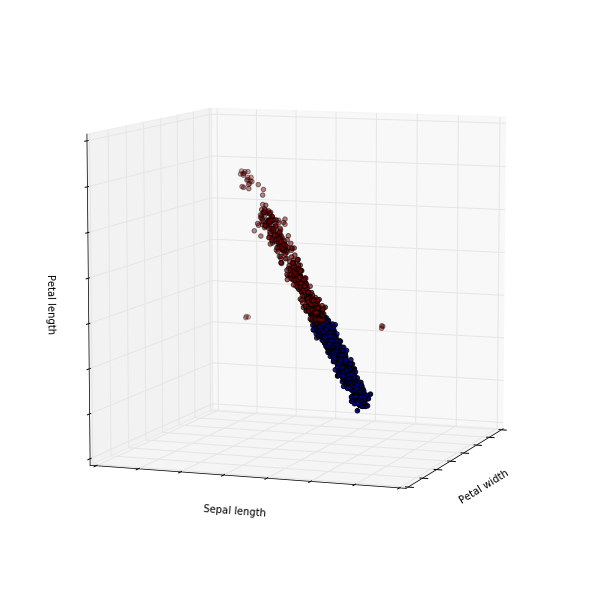

In [16]:
# input data
fileName = '23.txt';
X = makeDataFromFile(fileName,3,3);
# actions with data
nCluster = 3;
clusters = kMeansMine(X,nCluster);
# # output data
plotClusters(X,clusters);

In [139]:
def kNN(X,Clusters,y,k):
#     % X - data
#     % CL - data2cluster
#     % y - the point of interest
#     % k - the number of neighbors
#     % C - predicted class of the point of interest
    m = X.shape[0]
    DD= np.power((np.repeat([y], m,axis=0)-X), 2)
    d = np.sqrt( np.sum( DD, axis = 1 ) )
    idx = np.arange(0,m)
    d = np.column_stack((idx,d))
    d = d[d[:, 1].argsort()]
    idx = d[:k]
    clust = Clusters[idx[:,0].astype(int)]
    maxClust = np.max( clust )
    count = np.zeros( 1,maxClust )
    for i in range(0,len( clust )):
        count[ clust[ i ].astype(int) ] = count[ clust[ i ].astype(int) ] + 1;
    maxIdx  = np.argmax( count );
    C = maxIdx;
    return C

y = [2,2,2]
k = 40
kNN( X, clusters, y, k )

0